# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alya Fauzia Azizah
- **Email:** alyafauziaaz25@gmail.com
- **ID Dicoding:** alyafauzia

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi jumlah peminjaman sepeda pada setiap jam dalam seharinya?
- Bagaimana perbedaan pola penggunaan sepeda antara hari kerja dan hari libur untuk pelanggan casual dan registered?
- Sejauh mana faktor cuaca memengaruhi tingkat peminjaman sepeda, baik oleh pelanggan casual maupun registered?

## Import Semua Packages/Library yang Digunakan

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [27]:
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')
day_data.head(5)
# hour.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [28]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
print('Jumlah baris pada tabel hour ', hour_data.isnull().any(axis=1).sum())
print('Jumlah data yang duplicated ', hour_data.duplicated().sum())

Jumlah baris pada tabel hour  0
Jumlah data yang duplicated  0


Mengecek nilai negatif pada casual dan registered <p>Keduanya harus bernilai negatif

In [30]:
invalid_number = hour_data[(hour_data['casual']<0) | (hour_data['registered']<0)]

if not invalid_number.empty:
    print("Nilai tidak valid atau bernilai negatif:")
    print(invalid_number)
else:
    print("Tidak ada nilai yang tidak valid atau negatif")

Tidak ada nilai yang tidak valid atau negatif


Mengecek apakah nilai cnt merupakan jumlah dari casual dan registered

In [31]:
discrepancy_values = hour_data[hour_data['cnt'] != (hour_data['casual']) + (hour_data['registered'])]

if not discrepancy_values.empty:
    print('Ketidaksesuaian nilai ditemukan pada baris', len(discrepancy_values))
    print(discrepancy_values)
else:
    print('Tidak ada nilai yang tidak sesuai, cnt = casual + registered')

Tidak ada nilai yang tidak sesuai, cnt = casual + registered


**Insight:**
- Pada dataset day berjumlah 731, sedangkan pada dataset hour berjumlah 17379 yang berisi dari jam 0 hingga 23 selama tahun 2011 hingga 2012.
- Tidak ada data yang kosong.
- Tidak ada data yang sama atau duplicates.
- Tidak ada data untuk pengguna casual dan registered yang bernilai negatif.
- Nilai pada cnt sudah sesuai, jumlah dari casual + registered.

### Assessing Data

In [32]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Baik pada tabel hour dan day tidak memiliki nilai yang kosong ataupun duplicated, semua data sudah bersih.
- Kolom season, yr, mnth, dan hr didasarkan pada jumlah perhitungan dan kosisten. Diperlukan visualisasi untuk dilakukan analisis mendalam.
- Pada kolom **holiday**, pemimjam didominasi pada hari kerja (1 menunjukkan hari libur) dilihat pada rata-rata dengan nilai 0,02 menunjukkan angka yang rendah.
- Peminjaman pada libur (**weekday**) menunjukkan angka yang konsisten sehingga diperlukan analisis mendalam.
- Pada kolom **workdingday** (hari kerja), peminjaman didominasi pada hari kerja, ditunjukkan pada _mean_ dengan nilai 0,68 (1 merupakan hari kerja).
- Pada kolom **weathershit** menunjukkan kondisi cuaca dengan rentang 1-4. Nilai _mean_ bernilai 1,42 yang artinya peminjaman didominasi pada cuaca cerah atau cerah berawan.
- Pada kolom **temp** atau suhu yang telah dinormalisasi, _mean_ 0,49 menunjukkan bahwa peminjaman didominasi suhu sedang karena nilai minimum 0 dan maksimum 1.
- Pada kolom **atemp** atau suhu yang dirasakan dan telah dinormalisasi, menunjukkan angka yang hampir mirip dengan kolom temperatur sebelumnya. _mean_ menunjukkan angka 0,47 yang menunjukkan peminjaman didominiasi pada suhu sedang.
- Pada kolom **hum** atau kelembapan, _mean_ menunjukkan angka 0,62 yang menunjukkan peminjaman didominasi pada kelembapan yang sedang (0: kering, 1: kelembapan penuh) .
- Pada kolom **windspeed** atau kecepatan angin yang telah dinormalisasi, menunjukkan peminjaman didominasi dengan kecepatan angin yang rendah dengan _mean_ 0,19 (0: rendah, 1: tinggi).
- Pada kolom **casual**, menunjukan pelanggan tanpa keanggotaan. Nilai presentil Q1 = 4 lebih kecil dari presentil Q3 = 48. Nilai standar deviasi (std) = 49 lebih besar dari rata-rata (mean) = 35. Sehingga pada casual menunjukkan *Right-Skewd Distribution*.
- Pada kolom **registered**, menunjukkan pelanggan dengan membership. Memiliki nilai presentil Q1 = 34 lebih kecil dari presentil Q3 = 220. Nilai standar deviasi (std) = 151 dekat dengan (mean) = 153. Sehingga pada casual menunjukkan *Right-Skewd Distribution*.
- Pada kolom **cnt**, menunjukkan jumlah pelanggan pada setiap jam, menunjukkan persebaran data. Nilai minimal 1 dan maksimal 977 memiliki potensi outlier. Nilai presentil Q1 = 40 lebih kecil dari presentil Q3 = 281 menunjukkan bahwa pada kolom cnt memiliki *Right-Skewd Distribution*.
- Maka dari itu perlu dipastikan bahwa cnt merupakan jumlah dari kolom casual dan registered.

### Cleaning Data

In [33]:
# Define
# Mengganti tipe data pada dteday menjadi datetime dan season, yr, mnth, hr, holiday, weekday, workingday, dan weatersit menjadi category

# Code
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'], format="%Y-%m-%d")
hour_data['season'] = hour_data.season.astype('category')
hour_data['yr'] = hour_data.yr.astype('category')
hour_data['mnth'] = hour_data.mnth.astype('category')
hour_data['hr'] = hour_data.hr.astype('category')
hour_data['holiday'] = hour_data.holiday.astype('category')
hour_data['workingday'] = hour_data.workingday.astype('category')
hour_data['weekday'] = hour_data.weekday.astype('category')
hour_data['weathersit'] = hour_data.weathersit.astype('category')

# Test
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Kolom dteday merupakan tanggal sehingga diubah tipe data menjadi datetime.
- Kolom season, yr, mnth, hr, holiday, weekday, workingday, dan weatersit merupakan tipe data category karena setiap angka mewakili kelompok tertentu.

## Exploratory Data Analysis (EDA)

### Explore ...
1. Membuat diagram batang untuk melihat perbandingan distribusi pelanggan casual dan registered.
2. Membuat boxplot untuk mengetahui dan mengahandle nilai outlier sebelum dan sesudah.
3. Mengatasi nilai outlier dengan metode IQR untuk casual, registered, dan cnt.
4. Membuat visualisasi matriks korelasi untuk mengetahui hubungan antar fitur.

1. Diagram batang untuk distribusi pelanggan casual dan registered

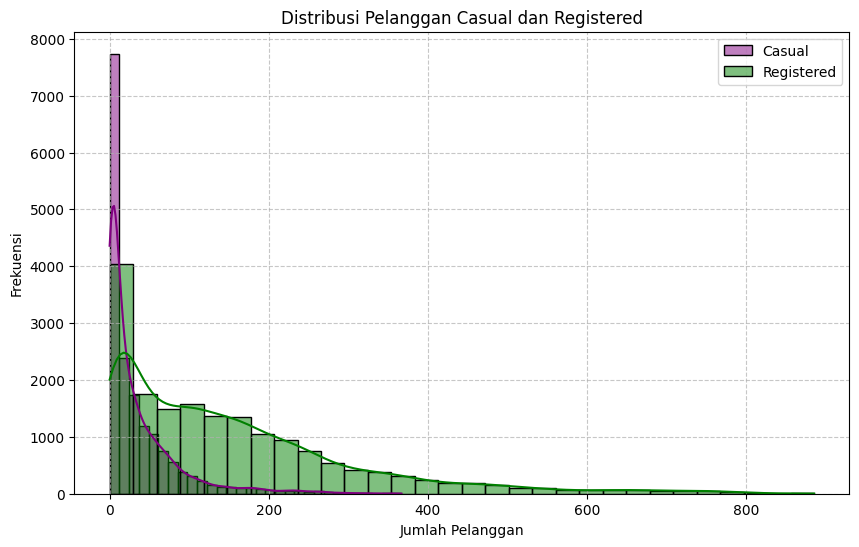

In [34]:
plt.figure(figsize=(10,6))

sns.histplot(hour_data['casual'], bins=30, color='purple', label='Casual', alpha=0.5, kde=True)
sns.histplot(hour_data['registered'], bins=30, color='green', label='Registered', alpha=0.5, kde=True)

plt.legend()
plt.title('Distribusi Pelanggan Casual dan Registered')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Frekuensi')
plt.grid(True, linestyle="--", alpha = 0.7)

plt.show()

**Insight:**
1. Tabel Casual (ditunjukkan pada garis ungu)
- Menunjukkan adanya outlier, pada awal tabel meunjukkan nilai yang tinggi dan mengalami kejatuhan yang besar sebelum grafik berada di tengah.
- Menunjukkan *Right-Skewed Distribution*, nilai peminjaman terkonsentrasi pada nilai yang rendah.
2. Tabel Registered (ditunjukkan pada garis berwarna hijau)
- Menunjukkan adanya outlier, namun tidak separah tabel casual dan distribusi lebih luas.
- Distribusi yang luas menunjukkan bahwa pelanggan registered lebih sering melakukan peminjaman dibandingkan dengan pelanggan casual.
- Menunjukkan *Right-Skewed Distribution*, namun titik tertinggi tidak sebanyak pelanggan casual.

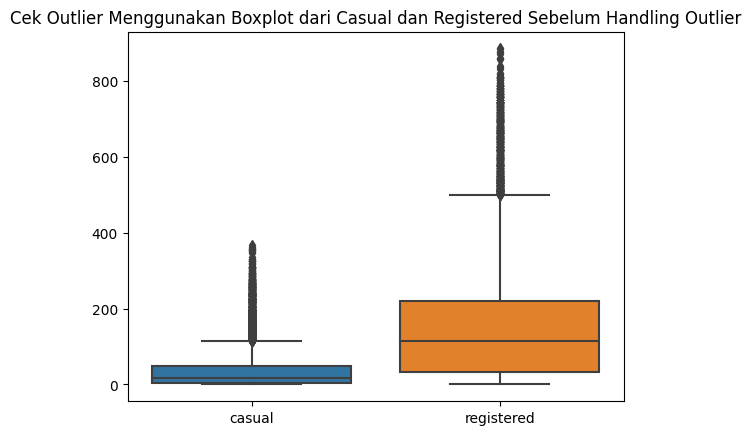

In [35]:
# Mengecek nilai outlier

sns.boxplot(data=hour_data[['casual','registered']])
plt.title('Cek Outlier Menggunakan Boxplot dari Casual dan Registered Sebelum Handling Outlier')
plt.show()

In [36]:
def remove_outlier(df, col):
    Q1 = df[col].quantile(0.25) # Kualtil 1
    Q3 = df[col].quantile(0.75) # Kualtil 3
    IQR = Q3 - Q1

    # Batas bawah dan atas
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return df[(df[col] >= lower) & (df[col] <= upper)]

hour_data_cleaned = remove_outlier(hour_data, 'casual')
hour_data_cleaned = remove_outlier(hour_data, 'registered')
hour_data_cleaned = remove_outlier(hour_data, 'cnt')

print(f"Jumlah data sebelum cleaning: {len(hour_data)}")
print(f"Jumlah data sesudah cleaning: {len(hour_data_cleaned)}")

Jumlah data sebelum cleaning: 17379
Jumlah data sesudah cleaning: 16874


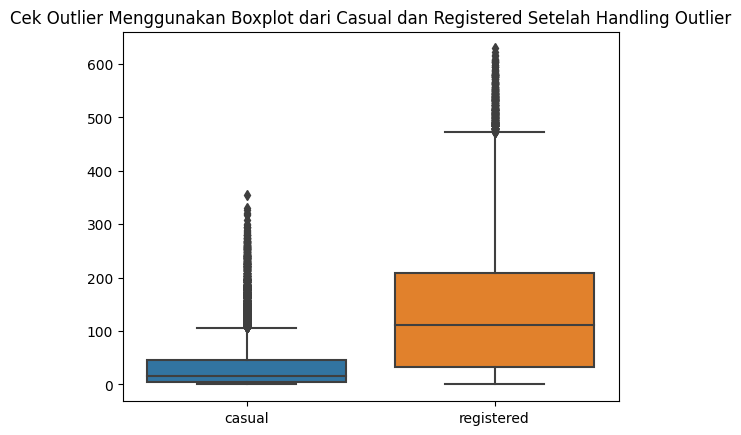

In [37]:
hour_data = hour_data_cleaned

# Mengecek nilai outlier

sns.boxplot(data=hour_data[['casual','registered']])
plt.title('Cek Outlier Menggunakan Boxplot dari Casual dan Registered Setelah Handling Outlier')
plt.show()

**Insight**
- Baik nilai Casual dan Registered menunjukkan nilai outlier yang sangat banyak dan mengindikasi banyaknya permintaan yang tidak biasa (outlier).
- Setelah handling outlier menggunakan IQR, masih terdapat outlier, namun distribusi outlier tidak sebanyak sebelumnya.
- Pada Casual (ditunjukkan dengan warna biru), menunjukkan persebaran berada di derah jaraknya yang lemah.
- Pada Registered (ditunjukkan dengan warna orange), menunjukkan distribusi pengguna lebih seimbang dibandingkan dengan Casual.
- Pada Registered memiliki kotak yang lebih besar mengindikasi bahwa variasi data lebih lebar dibandingkan pengguna biasa.

2. Grafik hubungan antar fitur

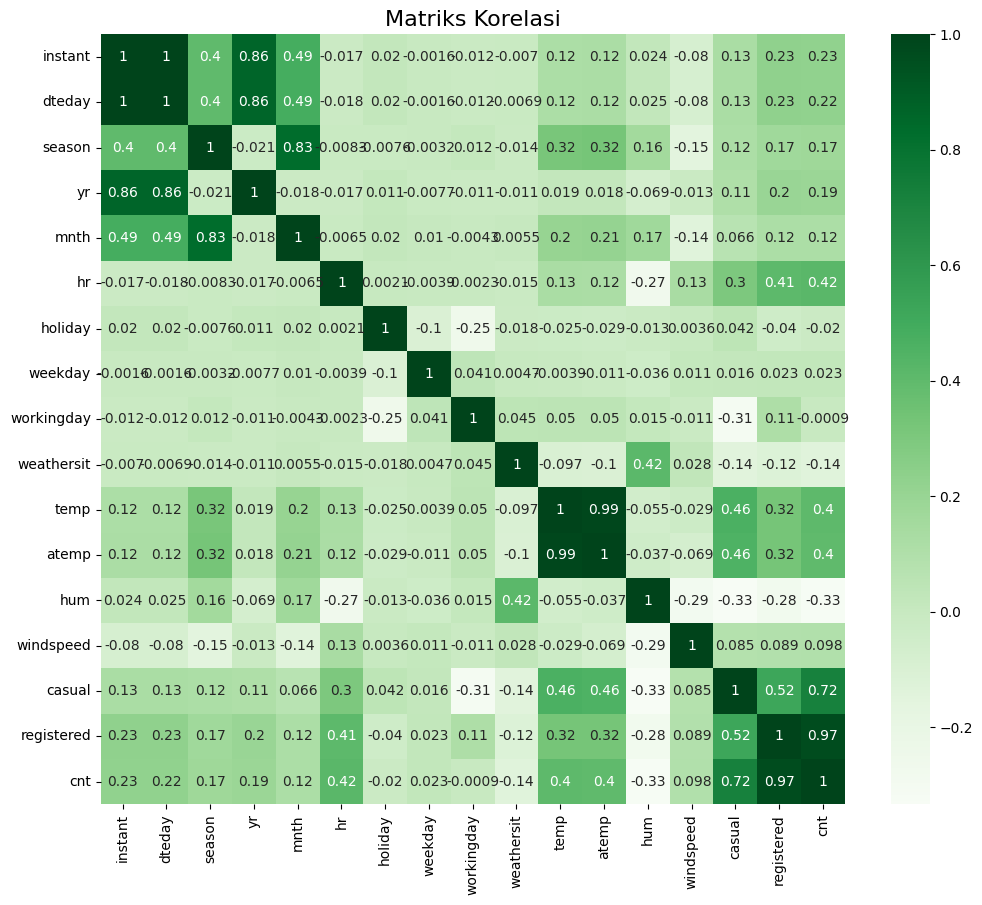

In [38]:
# Matriks Korelasi
plt.figure(figsize=(12,10))
correlation_matrix = hour_data.corr()

sns.heatmap(correlation_matrix, cmap='Greens', annot=True)
plt.title('Matriks Korelasi', fontsize=16)
plt.show()

**Insight**
- Matriks korelasi di atas menunjukkan hubungan antara fitur.
- Fitur atemp dan temp memiliki keterkaitan yang sangat dekat hampir mendekati angka 1.
- Fitur casual dan registered sama-sama memiliki keterkaitan yang tinggi dengan cnt.
- Keterkaitan atau korelasi fitur casual terhadap cnt lebih rendah dibandingkan dengan registered terhadap cnt.
- Fitur dengan identitas, seperti dteday, month, hr, yr, dan season memiliki keterikatan satu sama lainnya.
- Keadaan cuaca, seperti season, temp, atemp, dan windspeed memiliki keterkaitan yang positif dengan pengguna casual, registered, dan cnt.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana distribusi jumlah peminjaman sepeda pada setiap jam dalam seharinya?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25228\2837730234.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_data, x='hr', y='casual', color='purple', label='Casual', ci=None)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25228\2837730234.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_data, x='hr', y='registered', color='green', label='Registered', ci=None)


Text(0, 0.5, 'Count')

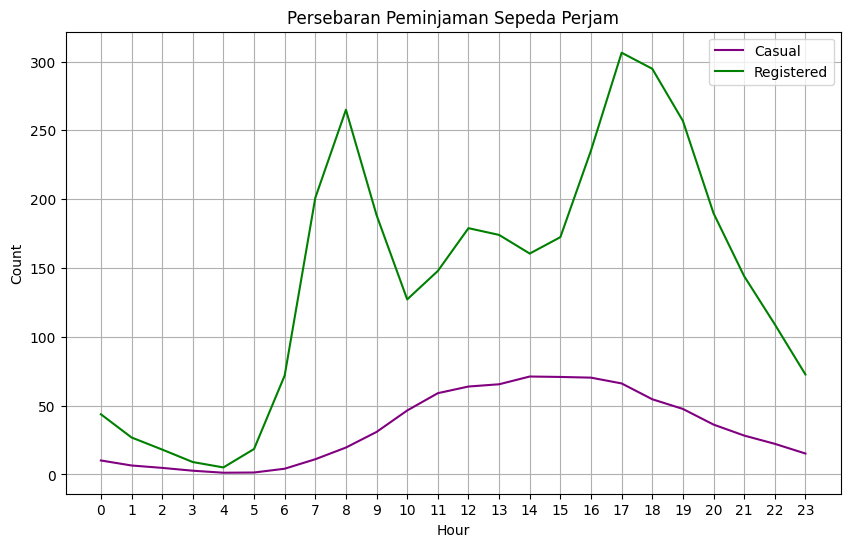

In [39]:
fig,ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=hour_data, x='hr', y='casual', color='purple', label='Casual', ci=None)
sns.lineplot(data=hour_data, x='hr', y='registered', color='green', label='Registered', ci=None)
ax.set_xticks(hour_data['hr'].unique())
plt.grid(True)
ax.set(title='Persebaran Peminjaman Sepeda Perjam')
ax.set_xlabel('Hour')
ax.set_ylabel('Count')

**Insight**
1. Peminjaman dari pelanggan registered menunjukkan pola peminjaman musiman karena menunjukkan angka peminjaman yang tinggi pada rush hour.
2. Peminjaman dari pelanggan casual cenderung lebih stabil mengalami peningkatan yang pelan dan tidak fluktuatif.
3. Peminjaman pelanggan registered lebih banyak dibandingkan dengan pelanggan casual

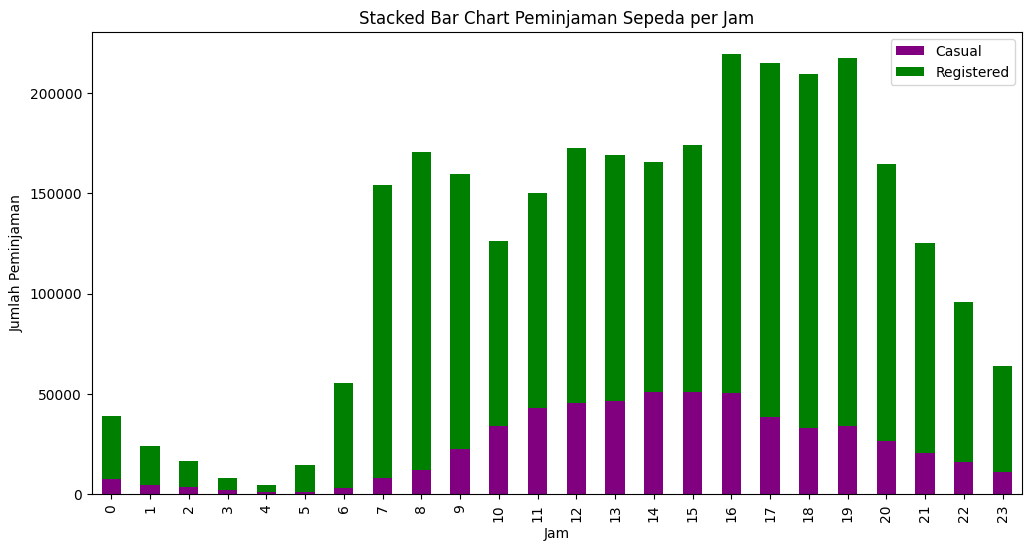

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
data_grouped = hour_data.groupby('hr')[['casual', 'registered']].sum()
data_grouped.plot(kind="bar", stacked=True, color=['Purple', 'Green'], ax=ax)
ax.set_title("Stacked Bar Chart Peminjaman Sepeda per Jam")
ax.set_xlabel("Jam")
ax.set_ylabel("Jumlah Peminjaman")
ax.legend(["Casual", "Registered"])
plt.show()

**Insight**
1. Peminjam dari pelanggan terdaftar (registered) lebih banyak dibandingkan dengan peminjam biasa (casual)
2. Pelanggan Registered memiliki pola musiman peminjaman akan meningkat di jam sibuk (Pagi: 8, Sore: 18-19, siang: 12-13).
3. Peminjaman pelanggan casual meningkat jam produktif di siang hari (Jam 8-19) dan tidak menunjukkan peningkatan pada jam sibuk.

### Pertanyaan 2:
Bagaimana perbedaan pola penggunaan sepeda antara hari kerja dan hari libur untuk pelanggan casual dan registered?

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


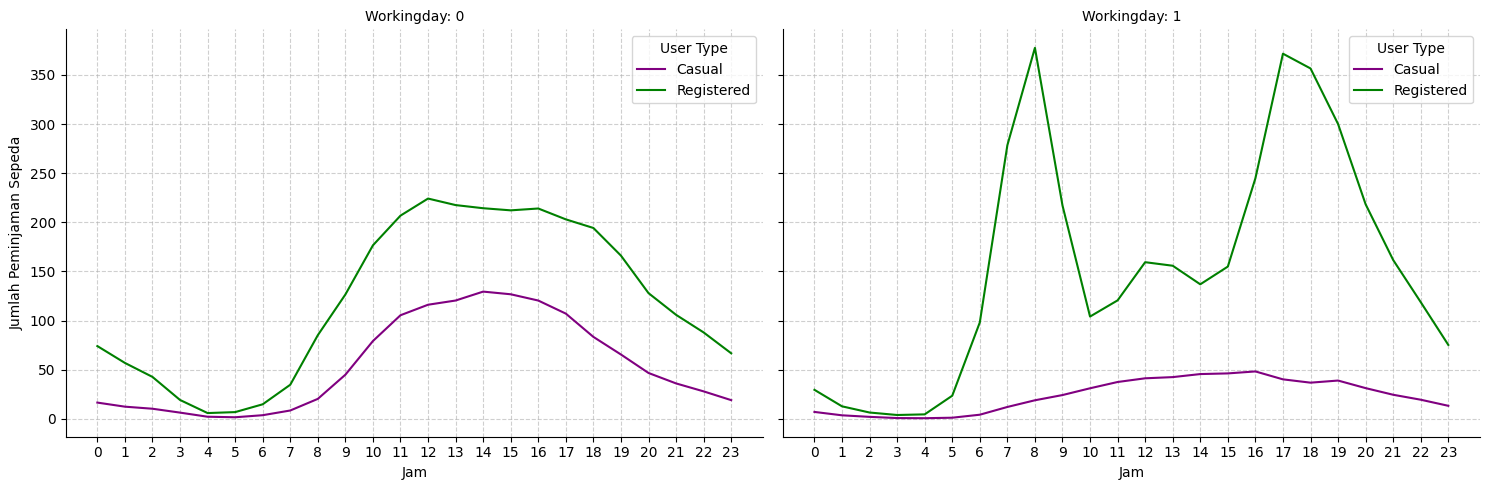

In [42]:
g = sns.FacetGrid(hour_data, col='workingday', height=5, aspect=1.5)
g.map_dataframe(sns.lineplot, x='hr', y='casual', label='Casual', ci=None, color='purple')
g.map_dataframe(sns.lineplot, x='hr', y='registered', label='Registered', ci=None, color='green')

# Judul dan Label
g.set_axis_labels('Jam', 'Jumlah Peminjaman Sepeda')
g.set_titles(col_template="Workingday: {col_name}")

for ax in g.axes.flat:
    ax.set_xticks(hour_data['hr'].unique())
    ax.grid(True, linestyle="--", alpha=0.6) 
    ax.legend(title="User Type", labels=['Casual', 'Registered'], loc='upper right')

# Menampilkan di Streamlit


**Insight:**
1. Pada Wokringday = 0 (bukan hari kerja/libur)
- Pola pelanggan casual dan registered memiliki pola yang sama.
- Peminjaman baik pada pelanggan casual dan registered mengalami puncak peningkatan peminjaman pada siang hari.
- Peminjaman pelanggan registered lebih tinggi dibandingkan pelanggan casual.
2. Pada Workingday = 1 (hari kerja)
- Pola pelanggan casual dan registered memiliki pola yang berbeda.
- Peminjaman pelanggan registered meningalami puncak peningkatan pada pukul 8 pagi, 12-13 siang, dan 17 sore. 
- Peminjaman pelanggan casual mulai mengalami peningkatan pada pukul 7 pagi dan memuncak di pukul 17.

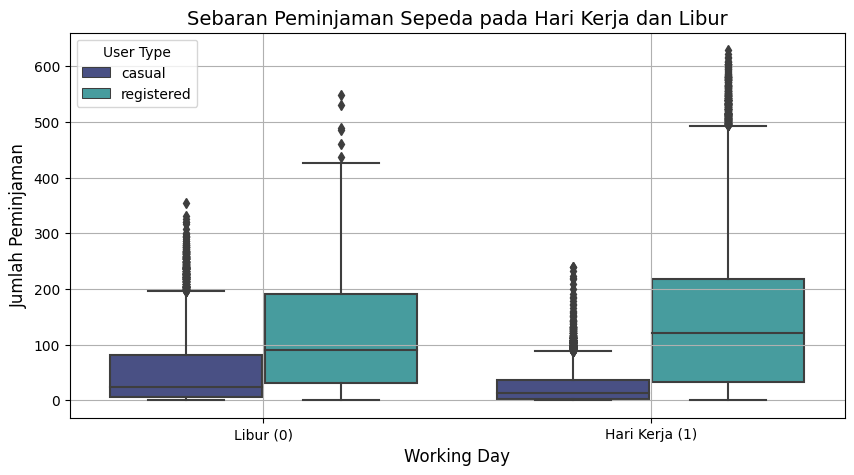

In [ ]:
# Melebur (melt) data agar casual dan registered bisa tampil dalam satu boxplot
hour_data_melted = hour_data.melt(id_vars=['workingday'], value_vars=['casual', 'registered'], var_name='User Type', value_name='Count')

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=hour_data_melted, x='workingday', y='Count', hue='User Type', palette="mako", ax=ax)
ax.set_title('Sebaran Peminjaman Sepeda pada Hari Kerja dan Libur', fontsize=14)
ax.set_xticklabels(['Libur (0)', 'Hari Kerja (1)']) 
ax.set_xlabel('Working Day', fontsize=12)
ax.set_ylabel('Jumlah Peminjaman', fontsize=12)
plt.grid(True)
plt.show()


**Insight:**
- Distribusi peminjaman sepeda pada hari libur lebih kecil dibandingkan peminjaman pada hari kerja.
- Peminjam registered lebih tinggi dibandingkan dengan pelanggan casual baik pada hari kerja maupun pada hari libur.
- Terdapat peminjaman yang tidak biasa (outlier) pada hari libur maupun hari kerja.
- Maka dari itu, pola yang terbentuk pada pertanyaan 1 dipengaruhi karena peminjaman di hari kerja lebih tinggi.

### Pertanyaan 3:
Sejauh mana faktor musim memengaruhi tingkat peminjaman sepeda, baik oleh pelanggan casual maupun registered?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25228\4090653135.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_data, x='hr', y='cnt', hue='season', ax=ax, color='dark', ci=None)


Text(0, 0.5, 'Count')

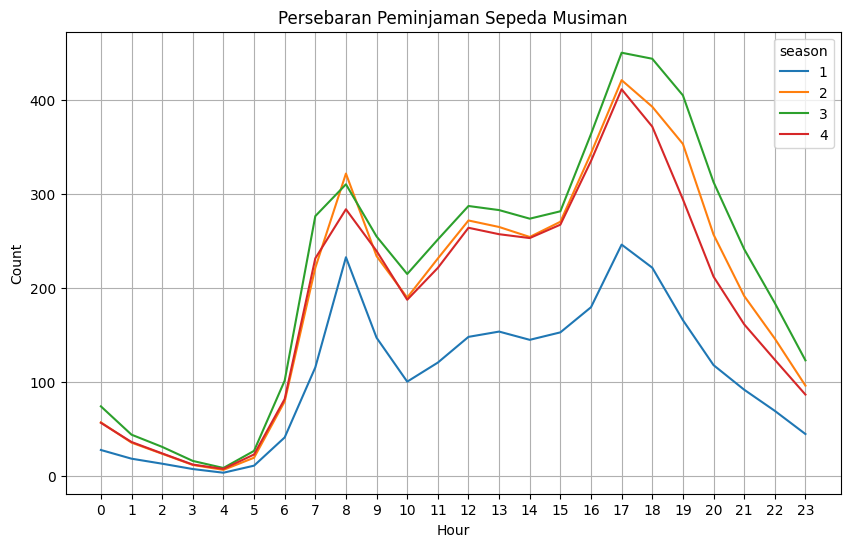

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=hour_data, x='hr', y='cnt', hue='season', ax=ax, color='dark', ci=None)
ax.set_xticks(hour_data['hr'].unique())
plt.grid(True)
ax.set(title='Persebaran Peminjaman Sepeda Musiman')
ax.set_xlabel('Hour')
ax.set_ylabel('Count')

**Insight:**
- Peminjaman berdasarkan jam menunjukkan pola yang sama
- Pada grafik garis berwarna biru, menunjukkan penurunan peminjaman karena cuaca ekstrim seperti hujan deras, badai, dan salju lebat.
- Peminjaman yang tinggi terjadi pada rush hour, di pagi hari, sore hari, dan jam istirahat.

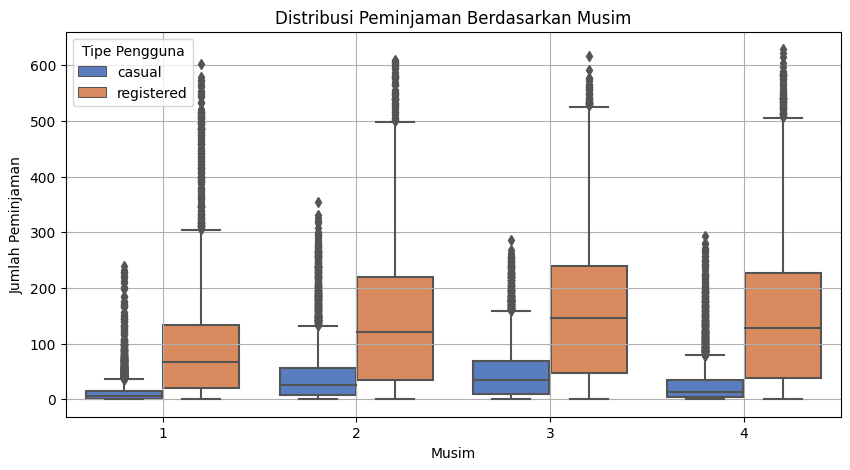

In [ ]:
# Transformasi data dengan melt agar bisa menggunakan hue untuk membedakan casual dan registered
hour_data_melted = hour_data.melt(id_vars=['season'], value_vars=['casual', 'registered'], var_name='User Type', value_name='Count')

fig, ax = plt.subplots(figsize=(10, 5))
# Boxplot dengan hue berdasarkan kategori casual & registered
sns.boxplot(data=hour_data_melted, x='season', y='Count', hue='User Type', 
            palette="muted", ax=ax)

ax.set(title='Distribusi Peminjaman Berdasarkan Musim', xlabel='Musim', ylabel='Jumlah Peminjaman')
ax.grid(True)
ax.legend(title='Tipe Pengguna')

plt.show()


**Insight:**
- Peminjaman paling banyak pada musim dengan kategori 3, yaitu saat cuaca cerah, tidak terlalu panas, dan hujan ringan atau salju ringan.
- Peminjaman paling sedikit terjadi pada musim dengan kategori 1, yaitu ketika cuaca sedang panas dan sedikit berawan.
- Distribusi peminjaman pada peminjam registered memiliki nilai outlier yang hampir sama dan persebaran pada musim 2 dan 3 hampir sama dan sedikit berbeda dengan musim 4.
- Peminjaman dengan nilai outlier paling banyak berada pada musim 1.
- Meskipun demikian, urutan peminjaman terbanyak oleh musim 3, 2, dan 4 dengan karakteristik cuaca sedang tidak terlalu panas dan terik.

<Axes: >

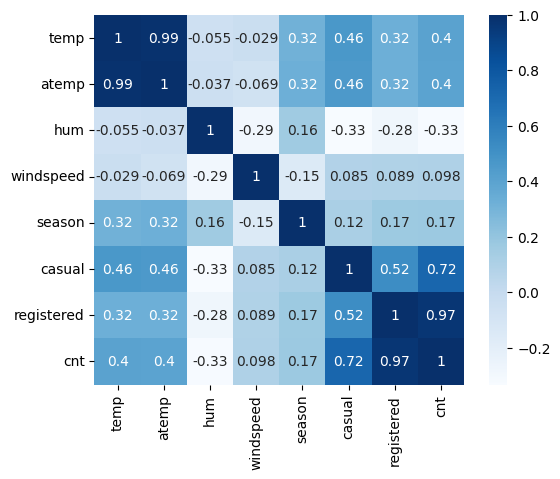

In [ ]:
corr_Season = hour_data[['temp', 'atemp', 'hum', 'windspeed', 'season', 'casual','registered', 'cnt']].corr()
# mask = np.array(corr_Season)
# mask[np.tril_indices_from(mask)] = False

sns.heatmap(corr_Season, square=True, annot=True, cmap='Blues')

**Insight:**
- Kondisi cuaca sangat berpengaruh terhadap peminjaman sepeda yang ditandai dengan matriks korelasi.
- Temperatur (temp), temperatur yang terasa (atemp), kecepatan angin (windspeed), dan musim (season) berpengaruh terhadap peminjaman.
- Hanya kelembapan (hum) yang tidak berpengaruh terhadap peminjaman sepeda.

## Analisis Lanjutan (Opsional)
Time-series data anomali

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25228\3080082880.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_data, x='dteday', y='cnt', label='Jumlah Peminjaman', alpha=0.6, ci=None)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25228\3080082880.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_data, x='dteday', y='registered', label='Registered', alpha=0.6, ci=None)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25228\3080082880.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_data, x='dteday', y='casual', label='Casual', alpha=0.6, ci=None)


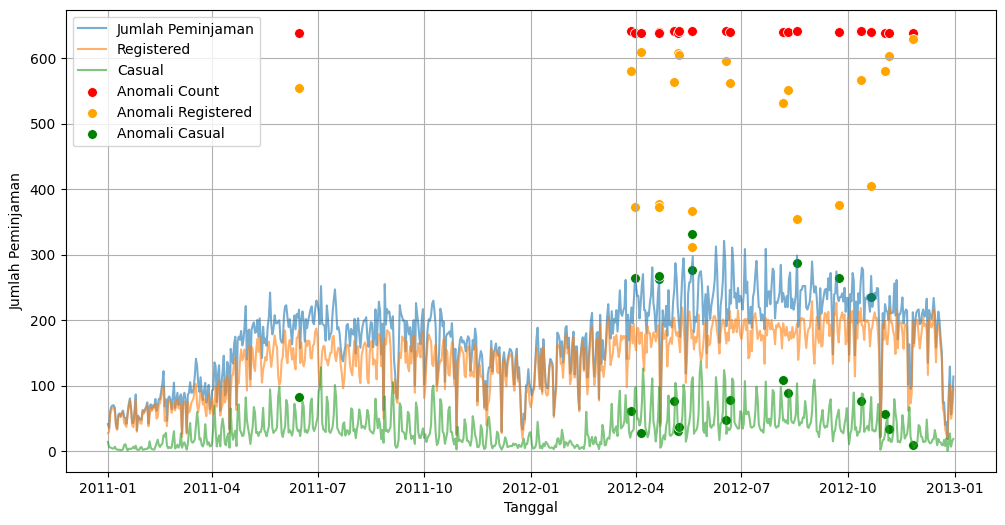

In [44]:
# Menghitung Z-Score
fig, ax = plt.subplots(figsize=(12, 6))

hour_data['z_score'] = (hour_data['cnt'] - hour_data['cnt'].mean()) / hour_data['cnt'].std()

# Menentukan threshold anomali (Z-Score > 3 atau < -3)
threshold = 3
hour_data['anomaly'] = hour_data['z_score'].abs() > threshold

sns.lineplot(data=hour_data, x='dteday', y='cnt', label='Jumlah Peminjaman', alpha=0.6, ci=None)
sns.lineplot(data=hour_data, x='dteday', y='registered', label='Registered', alpha=0.6, ci=None)
sns.lineplot(data=hour_data, x='dteday', y='casual', label='Casual', alpha=0.6, ci=None)
sns.scatterplot(data=hour_data[hour_data['anomaly']], x='dteday', y='cnt', color='red', label='Anomali Count', s=50)
sns.scatterplot(data=hour_data[hour_data['anomaly']], x='dteday', y='registered', color='Orange', label='Anomali Registered', s=50)
sns.scatterplot(data=hour_data[hour_data['anomaly']], x='dteday', y='casual', color='Green', label='Anomali Casual', s=50)
# plt.title('Tren Peminjaman Sepeda dan Anomali')
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah Peminjaman')
ax.legend()
ax.grid(True)
# ax.show()


**Insight:**
- Peminjaman sepeda dari tahun 2011 dan 2012 pada pengguna Casual dan Registered memiliki pola yang sama.
- Memasuki pertengahan tahun, peminjaman akan meningkat.
- Peminjaman pada setiap awal tahun mengalami penurunan dan akan kembali meningkat di pertengahan tahun.
- Anomali peminjaman yang drastis terlihat pada akhir tahun 2012.
- Terjadi peminjaman yang sangat tajam bagi pengguna Registered di pertengahan tahun 2012, namun mengalami penurunan yang drastis pada akhir memasuki akhir tahun 2012.
- Anomali yang dihasilkan pada peminjaman total sangat tinggi, melebihi angka 600 peminjaman.
- Anomali yang dihasilkan pada peminjaman pengguna registered lebih tinggi dibandingkan peminjam casual.
- Distribusi anomali pada pengguna registered menunjukkan angka yang tinggi, dengan jarak 300 hingga 600 peminjaman.
- Anomali pada pengguna casual lebih rendah dibandingkan pengguna registered.
- Distribusi anomali pada casual berkisar diantara 0 hingga 350.

## Conclusion

**Q1 (Distribusi jumlah peminjaman berdasarkan jam pada setiap harinya)**
- Peminjam dari pelanggan registered lebih banyak pada peminjam casual.
- Peminjam registered lebih banyak meminjam pada jam sibuk seperti jam 8 pagi, jam 12-13 siang, dan jam 17 sore.
- Peminjaman pelanggan casual meningkat jam produktif di siang hari (Jam 8-19) dan tidak menunjukkan peningkatan pada jam sibuk.

**Q2 (Perbedaan pola peminjaman sepeda pada hari libur dan hari kerja)**
*Hari libur*
- Pola peminjam casual dan registered memiliki pola yang sama yang akan meningkat pada siang hari.
- Peminjam Pelanggan registered lebih banyak dibandingkan dengan pelanggan casual.
<br>
*Hari kerja*
</br>
- Pola peminjaman casual dan registered berbeda.
- Peminjaman pelanggan registered meningkat pada jam sibuk.
- Peminjaman pelanggan casual mengalami peningkatan pada jam produktif di siang hari.
<br>
</br>
- Distribusi peminjaman sepeda pada hari libur lebih lecil dibandingkan dengan hari kerja.
- Baik pada hari kerja maupun hari libur, peminjaman pelanggan registered lebih tinggi dibandingkan pelanggan casual.
- Terdapat jumlah pemesanan yang tidak biasa, terutama pada peminjan registered di hari kerja.

**Q3 (Faktor cuaca mempengaruhi tingkat peminjaman)**
- Peminjaman pada musim cuaca cerah dan tidak terlalu panas (musim=3) memiliki jumlah peminjaman lebih banyak dan distribusi lebih besar.
- Pola peminjaman pada setiap musim di setiap jamnya sama.
- Kondisi musim sangat berpengaruh terhadap peminjaman sepeda yang ditandai dengan nilai korelasi yang paling besar terhadap semua fitur.
- Temperatur (temp), temperatur yang terasa (atemp), kecepatan angin (windspeed), dan musim (season) berpengaruh terhadap peminjaman.
- Hanya kelembapan (hum) yang tidak berpengaruh terhadap peminjaman sepeda.

### Additional Analysis (Time-Series Anomali)
- Peminjaman meningkat pada pertengahan tahun.
- Anomali peminjaman mayoritas terlihat pada saat penjualan mengalami meningkatan.
- Distribusi persebaran outlier pada pelanggan casual dan registered memiliki jarak yang sama berada di angka 300-350.
- Anomali sangat terlihat pada peminjaman di akhir tahun 2012 yang diikuti dengan penurunan peminjaman yang sangat drastis.
- Anomali peminjam registered lebih tinggi dibandingkan dengan peminjam casual

## Saran
- Peminjam pada sore dan pagi pada hari kerja paling banyak, terutama pada peminjam registered. Dapat dibuat promosi menjadi member atau pada jam tertentu.
- Peminjam pada akhir tahun mengalami penurunan, buat promosi di hari-hari spesial, misalnya natal, tahun baru, dan valentine.
- Peminjam pada musim tertentu mengalami penurunan, misalnya pada cuaca bersalju. Buat perbaikan dan pemeliharaan karena akan banyak sepeda mungkin tidak akan terpakai dan mengalami peningkatan memasuki pertengahan tahun. Sehingga pengguna merasa nyaman dan percaya menggunakan produk.
- Membuat harga spesial pada hari libur agar menjadi pengguna registered mengingat jumlah pengguna casual dan registered hampir sama pada hari libur.

In [ ]:
# Save all data
hour_data.to_csv('dashboard/main_data.csv')